In [3]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"darkzap","key":"0fbd49d0cde72fe57813ebd06189147c"}'}

In [6]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d arbethi/diabetic-retinopathy-level-detection

100% 9.64G/9.66G [01:02<00:00, 135MB/s]
100% 9.66G/9.66G [01:02<00:00, 165MB/s]


In [8]:
!unzip diabetic-retinopathy-level-detection.zip

Archive:  diabetic-retinopathy-level-detection.zip
  inflating: inception-diabetic.h5   
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cfb17a7cc8d4.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cfdbaef73a8b.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cfed7c1172ec.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cff262ed8f4c.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cffc50047828.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d02b79fc3200.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d0926ed2c8e5.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d160ebef4117.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d16e39b9d6f0.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d16e59a2b33a.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d18f64

In [9]:
from google.colab import files

files.upload()

KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
imagesize= [299,299]
trainpath= r"/content/preprocessed dataset/preprocessed dataset/training"
testpath= r"/content/preprocessed dataset/preprocessed dataset/testing"

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range  = 0.2,
                                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1.255)


In [13]:
train_set=train_datagen.flow_from_directory('/content/preprocessed dataset/preprocessed dataset/training',
                                            target_size=(299,299),
                                            batch_size=64,
                                            class_mode= 'categorical')
test_set=test_datagen.flow_from_directory('/content/preprocessed dataset/preprocessed dataset/testing',
                                            target_size=(299,299),
                                            batch_size=64,
                                            class_mode='categorical')

Found 3662 images belonging to 5 classes.
Found 734 images belonging to 5 classes.


## Transfer Learning

In [14]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.xception import Xception, preprocess_input
from glob import glob
import numpy as пр
import matplotlib.pyplot as plt

In [15]:
xception = Xception(input_shape=imagesize + [3], weights= 'imagenet' ,include_top=False)

83683744/83683744 [==============================] - 1s 0us/step


In [16]:
for layer in xception.layers:
  layer.trainable=False

In [17]:
xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [18]:
x=Flatten()(xception.output)

In [19]:
x=Dense(128, activation='relu')(x)
x=Dense(86, activation='softplus')(x)
x=Dense(64, activation='relu')(x)
x=Dense(32, activation='relu')(x)
x=Dense(16, activation='relu')(x)
pred=Dense(5,activation='softmax')(x)

In [20]:
model=Model(inputs=xception.input,outputs=pred)

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
r=model.fit(train_set,validation_data=test_set,epochs=35,steps_per_epoch=len(train_set)//32,validation_steps=len(test_set)//32)

Epoch 1/35
1/1 [==============================] - 54s 54s/step - loss: 1.8143 - accuracy: 0.0781
Epoch 2/35
1/1 [==============================] - 39s 39s/step - loss: 2.6594 - accuracy: 0.0938
Epoch 3/35
1/1 [==============================] - 38s 38s/step - loss: 2.0994 - accuracy: 0.2969
Epoch 4/35
1/1 [==============================] - 48s 48s/step - loss: 2.1983 - accuracy: 0.3438
Epoch 5/35
1/1 [==============================] - 40s 40s/step - loss: 2.8196 - accuracy: 0.0938
Epoch 6/35
1/1 [==============================] - 43s 43s/step - loss: 2.7546 - accuracy: 0.3281
Epoch 7/35
1/1 [==============================] - 38s 38s/step - loss: 1.3688 - accuracy: 0.6875
Epoch 8/35
1/1 [==============================] - 39s 39s/step - loss: 2.3318 - accuracy: 0.5625
Epoch 9/35
1/1 [==============================] - 38s 38s/step - loss: 1.2982 - accuracy: 0.6250
Epoch 10/35
1/1 [==============================] - 38s 38s/step - loss: 1.0692 - accuracy: 0.6562
Epoch 11/35
1/1 [============

In [ ]:
model.save('first-model.h5')
print("Model Saved!!")

Model Saved!!


In [26]:
import matplotlib.pyplot as plt

KeyError: ignored

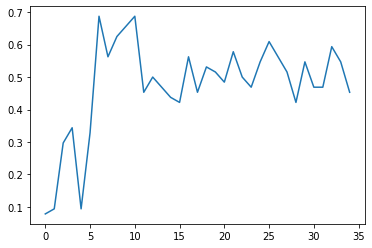

In [27]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: ignored

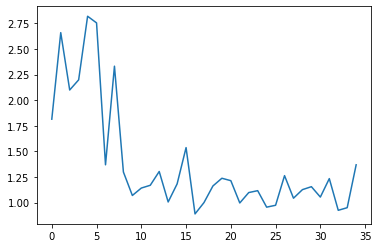

In [28]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import pickle
fl='ibm1.pkl'
pickle.dump(model, open(fl ,'wb'))

In [ ]:
import pickle

In [ ]:
file=open('/content/ibm.pkl','rb')
model=pickle.load(file)
file.close()

UnpicklingError: ignored

In [ ]:
from tensorflow.keras.models import load_model

In [48]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score ,r2_score,precision_recall_curve

In [30]:
y_pred=model.predict(test_set)

12/12 [==============================] - 338s 27s/step


In [31]:
import numpy as np

In [32]:
y_bin=np.argmax(y_pred,axis=1)

In [33]:
accuracy_score(test_set.classes,y_bin)

0.49182561307901906

In [34]:
classification_report(test_set.classes,y_bin)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.49      1.00      0.66       361\n           1       0.00      0.00      0.00        74\n           2       0.00      0.00      0.00       200\n           3       0.00      0.00      0.00        39\n           4       0.00      0.00      0.00        60\n\n    accuracy                           0.49       734\n   macro avg       0.10      0.20      0.13       734\nweighted avg       0.24      0.49      0.32       734\n'

In [35]:
confusion_matrix(test_set.classes,y_bin)

array([[361,   0,   0,   0,   0],
       [ 74,   0,   0,   0,   0],
       [200,   0,   0,   0,   0],
       [ 39,   0,   0,   0,   0],
       [ 60,   0,   0,   0,   0]])

In [37]:
r2_score(test_set.classes,y_bin)

-0.756175066713825